In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.precision = 7
pd.options.display.max_rows = 500

/Users/naoki/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/naoki/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_train = pd.read_csv("./input/train.csv")
merchants = pd.read_csv("./input/merchants.csv")

In [3]:
df_test = pd.read_csv("./input/test.csv")

In [4]:
h_trs = pd.read_csv("./input/historical_transactions.csv")
n_trs = pd.read_csv("./input/new_merchant_transactions.csv")

trs = pd.concat([h_trs, n_trs], axis=0).reset_index(drop=True)

In [8]:
card_df_dict = {c:"train" for c in df_train.card_id.unique()}
for c in df_test.card_id.unique():
    card_df_dict[c] = "test"

In [18]:
np.min(df_train.first_active_month)

'2011-11'

In [17]:
df_train[df_train.card_id == "C_ID_0e171c1b48"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
117542,2017-03,C_ID_0e171c1b48,3,2,1,-1.6182134


In [16]:
df_test[df_test.card_id =="C_ID_0e171c1b48"]

,first_active_month,card_id,feature_1,feature_2,feature_3


In [48]:
df_train["2**x"] = df_train.target.apply(lambda x:2**x)

In [21]:
np.max(df_train.target)

17.9650684

In [22]:
2**17.9650684

255873.0008725488

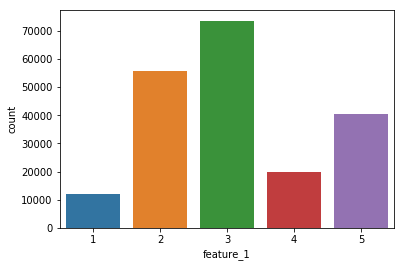

In [87]:
sns.countplot(df_train.feature_1)

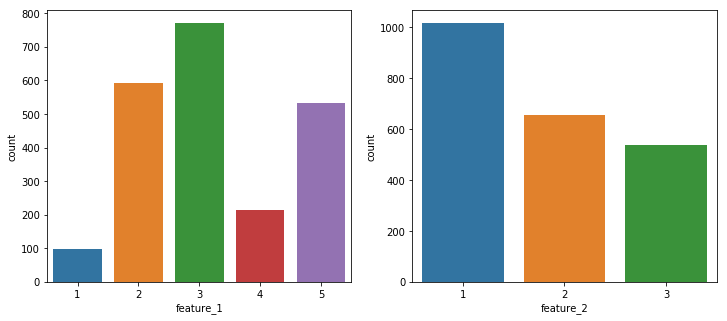

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df_train[df_train.target <= -30].feature_1)

plt.subplot(1,2,2)
sns.countplot(df_train[df_train.target <= -30].feature_2)

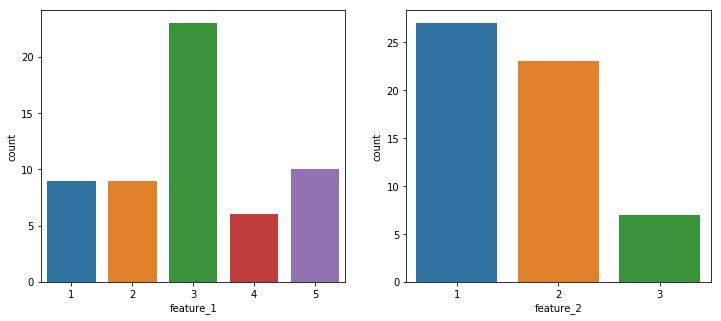

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df_train[(df_train.target<=-10)&(df_train.target>=-30)].feature_1)

plt.subplot(1,2,2)
sns.countplot(df_train[(df_train.target<=-10)&(df_train.target>=-30)].feature_2)

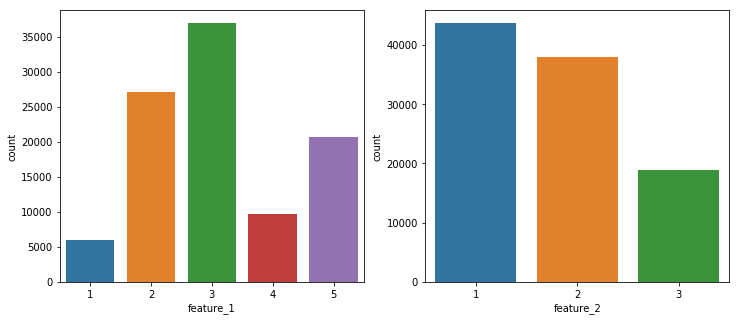

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df_train[(df_train.target<0)&(df_train.target>-10)].feature_1)

plt.subplot(1,2,2)
sns.countplot(df_train[(df_train.target<0)&(df_train.target>-10)].feature_2)

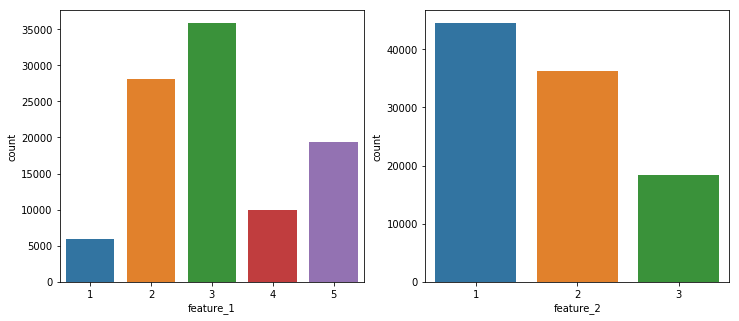

In [85]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df_train[(df_train.target<10)&(df_train.target>=0)].feature_1)

plt.subplot(1,2,2)
sns.countplot(df_train[(df_train.target<10)&(df_train.target>=0)].feature_2)

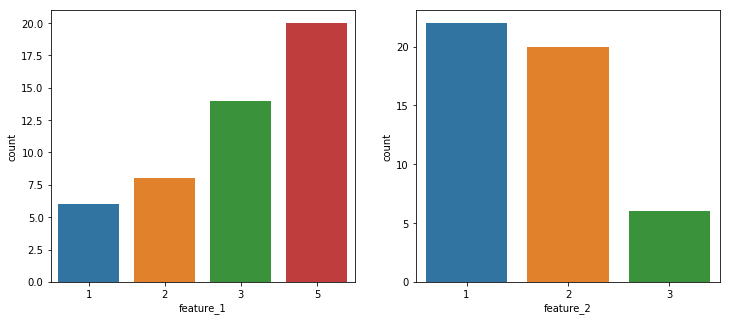

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df_train[df_train.target>=10].feature_1)

plt.subplot(1,2,2)
sns.countplot(df_train[df_train.target>=10].feature_2)

In [88]:
df_train[df_train.target <= -30]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,2**x
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.2192809,1.0000000e-10
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.2192809,1.0000000e-10
125,2015-10,C_ID_e9120f535c,3,3,1,-33.2192809,1.0000000e-10
151,2017-03,C_ID_65715cb80d,4,2,0,-33.2192809,1.0000000e-10
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.2192809,1.0000000e-10
248,2015-07,C_ID_c4262c902e,5,1,1,-33.2192809,1.0000000e-10
254,2017-03,C_ID_6a2c823e5f,2,1,0,-33.2192809,1.0000000e-10
386,2017-06,C_ID_98e1cb10b6,2,3,0,-33.2192809,1.0000000e-10
467,2017-03,C_ID_eb8175721a,4,1,0,-33.2192809,1.0000000e-10
515,2016-04,C_ID_a2580006bf,4,2,0,-33.2192809,1.0000000e-10


# outlier

In [60]:
df_train[df_train.card_id == "C_ID_2e49ece8b1"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
566,2016-12,C_ID_2e49ece8b1,2,3,0,-33.2192809


In [61]:
trs[trs.card_id == "C_ID_2e49ece8b1"].sort_values(by="purchase_date")

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
18496645,N,C_ID_2e49ece8b1,-1,Y,4,C,690,M_ID_c9855bf3e3,-11,0.0164390,2017-01-08 15:01:29,NaN,-1,1
18496665,N,C_ID_2e49ece8b1,-1,Y,4,C,690,M_ID_c9855bf3e3,-11,0.0164390,2017-01-08 15:01:49,NaN,-1,1
18496654,Y,C_ID_2e49ece8b1,69,N,1,B,307,M_ID_9e8aa8c8e6,-11,-0.6717752,2017-01-14 15:40:59,1.0,9,19
18496636,Y,C_ID_2e49ece8b1,69,N,1,B,80,M_ID_c03b62d83d,-11,-0.7063362,2017-01-17 19:28:52,1.0,9,37
18496666,Y,C_ID_2e49ece8b1,69,N,1,B,705,M_ID_aebbe32c0d,-11,-0.5610599,2017-01-19 21:32:23,1.0,9,33
18496671,Y,C_ID_2e49ece8b1,69,N,1,B,705,M_ID_1f4773aa76,-11,-0.5875817,2017-01-19 22:30:36,1.0,9,33
18496635,Y,C_ID_2e49ece8b1,69,N,1,B,307,M_ID_8e5e172c5a,-11,-0.5515481,2017-01-22 12:56:34,1.0,9,19
18496661,Y,C_ID_2e49ece8b1,69,N,1,B,437,M_ID_ca4d18b336,-11,-0.1830229,2017-01-24 12:24:52,1.0,9,15
18496673,Y,C_ID_2e49ece8b1,69,N,1,B,437,M_ID_ca4d18b336,-11,-0.6884847,2017-01-24 12:26:38,1.0,9,15
18496652,Y,C_ID_2e49ece8b1,69,N,1,B,705,M_ID_1f4773aa76,-11,-0.6619329,2017-01-24 12:46:47,1.0,9,33


In [39]:
df_train[df_train.card_id == "C_ID_8186f3fcc1"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.2192809


In [40]:
trs[trs.card_id == "C_ID_8186f3fcc1"].sort_values(by="purchase_date")

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
27971445,Y,C_ID_8186f3fcc1,304,N,1,B,690,M_ID_fbd2a9a388,-5,-0.6117143,2017-09-30 21:07:14,5.0,20,1
27971448,Y,C_ID_8186f3fcc1,69,N,1,B,561,M_ID_50f575c681,-5,-0.6943150,2017-09-30 22:03:11,1.0,9,7
27971454,Y,C_ID_8186f3fcc1,304,N,1,B,842,M_ID_7c585263d0,-4,-0.6140133,2017-10-01 01:59:12,5.0,20,37
27971482,Y,C_ID_8186f3fcc1,149,N,1,B,560,M_ID_ac22131557,-4,-0.7303786,2017-10-03 00:00:00,5.0,20,34
27971463,Y,C_ID_8186f3fcc1,149,N,1,B,80,M_ID_9f09013e74,-4,-0.7138495,2017-10-04 15:27:45,5.0,20,37
27971465,Y,C_ID_8186f3fcc1,149,N,1,B,307,M_ID_67a3c4eb53,-4,-0.5966427,2017-10-04 17:26:38,5.0,20,19
27971492,Y,C_ID_8186f3fcc1,-1,Y,1,B,879,M_ID_9139332ccc,-4,-0.1140061,2017-10-04 22:24:45,NaN,-1,29
27971514,Y,C_ID_8186f3fcc1,-1,Y,1,B,472,M_ID_efcc631498,-4,-0.6868017,2017-10-05 03:32:10,NaN,-1,4
27971512,Y,C_ID_8186f3fcc1,149,N,1,B,80,M_ID_9f09013e74,-4,-0.7198601,2017-10-05 15:02:11,5.0,20,37
27971503,Y,C_ID_8186f3fcc1,149,N,1,B,705,M_ID_df53b3a9f6,-4,-0.6895666,2017-10-06 22:09:36,5.0,20,33


In [41]:
df_train[df_train.card_id == "C_ID_c4262c902e"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
248,2015-07,C_ID_c4262c902e,5,1,1,-33.2192809


In [42]:
trs[trs.card_id == "C_ID_c4262c902e"].sort_values(by="purchase_date")

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
27448158,Y,C_ID_c4262c902e,-1,Y,1,B,661,M_ID_9e84cda3b1,-6,-0.6103168,2017-01-06 01:09:06,NaN,-1,8
27448144,Y,C_ID_c4262c902e,117,N,4,C,451,M_ID_2996c49c66,-6,-0.1368314,2017-01-24 14:05:14,1.0,9,7
27448141,N,C_ID_c4262c902e,117,N,1,B,529,M_ID_8b12cecbe7,-6,-0.6462302,2017-01-31 16:28:00,1.0,9,20
27448153,Y,C_ID_c4262c902e,117,N,1,B,529,M_ID_8b12cecbe7,-6,-0.6462302,2017-01-31 16:28:00,1.0,9,20
27448159,Y,C_ID_c4262c902e,117,N,3,C,415,M_ID_0081248150,-6,0.0915716,2017-01-31 17:35:50,1.0,9,18
27448164,N,C_ID_c4262c902e,117,N,3,C,309,M_ID_b540211de2,-5,3.3042398,2017-02-02 09:06:46,1.0,9,21
27448161,N,C_ID_c4262c902e,117,N,3,C,309,M_ID_b540211de2,-5,2.2583946,2017-02-02 09:07:48,1.0,9,21
27448157,Y,C_ID_c4262c902e,-1,Y,1,B,661,M_ID_9e84cda3b1,-5,-0.6103168,2017-02-06 03:21:24,NaN,-1,8
27448143,N,C_ID_c4262c902e,117,N,3,C,309,M_ID_b540211de2,-5,2.1832620,2017-02-14 14:32:29,1.0,9,21
27448160,N,C_ID_c4262c902e,117,N,3,C,309,M_ID_b540211de2,-5,2.1832620,2017-02-14 14:33:08,1.0,9,21


# low

In [43]:
df_train[df_train.card_id == "C_ID_3f7ba15ec2"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
5888,2017-06,C_ID_3f7ba15ec2,1,1,0,-17.4926395


In [44]:
trs[trs.card_id == "C_ID_3f7ba15ec2"].sort_values(by="purchase_date")
#-17.4926395

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
19363197,Y,C_ID_3f7ba15ec2,87,N,1,B,278,M_ID_224e2fbb87,-8,-0.5665896,2017-06-10 00:40:59,3.0,11,37
19363072,Y,C_ID_3f7ba15ec2,69,N,1,B,879,M_ID_00a6ca8a8a,-8,-0.6492355,2017-06-10 03:03:48,1.0,9,29
19362972,Y,C_ID_3f7ba15ec2,87,N,3,C,437,M_ID_82b9718db4,-8,-0.0976122,2017-06-10 10:34:35,3.0,11,15
19363243,Y,C_ID_3f7ba15ec2,87,N,1,B,278,M_ID_e868e28622,-8,-0.6662154,2017-06-10 16:41:10,3.0,11,37
19363098,Y,C_ID_3f7ba15ec2,87,N,1,B,278,M_ID_09ca5a1022,-8,-0.6526916,2017-06-10 19:02:35,3.0,11,37
19363008,Y,C_ID_3f7ba15ec2,87,N,1,B,278,M_ID_fc7d63c6c1,-8,-0.6838866,2017-06-10 23:08:09,3.0,11,37
19363316,Y,C_ID_3f7ba15ec2,69,N,1,B,879,M_ID_00a6ca8a8a,-8,-0.6695213,2017-06-11 03:29:07,1.0,9,29
19363297,Y,C_ID_3f7ba15ec2,87,N,1,B,683,M_ID_267bed305d,-8,-0.7144505,2017-06-11 04:12:53,3.0,11,34
19363028,Y,C_ID_3f7ba15ec2,87,N,1,B,278,M_ID_fc7d63c6c1,-8,-0.6874329,2017-06-11 14:09:52,3.0,11,37
19363236,Y,C_ID_3f7ba15ec2,2,N,1,B,307,M_ID_2efaadc5ca,-8,-0.6063348,2017-06-12 14:04:14,3.0,11,19


In [58]:
df_train[df_train.card_id == "C_ID_e954ad8a0a"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,2**x
8386,2016-11,C_ID_e954ad8a0a,1,1,0,-17.1896364,0.0000067


In [59]:
trs[trs.card_id == "C_ID_e954ad8a0a"].sort_values(by="purchase_date")

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
9376846,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_76f9ffad4b,-13,-0.7022791,2017-01-02 12:32:45,1.0,15,37
9376839,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_76f9ffad4b,-13,-0.6937139,2017-01-05 13:08:37,1.0,15,37
9376864,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_deb43ff012,-13,-0.5394668,2017-01-06 23:32:30,1.0,15,37
9376810,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_deb43ff012,-13,-0.5218107,2017-01-07 17:18:32,1.0,15,37
9376815,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_8be86dc291,-13,-0.6297010,2017-01-12 13:45:06,1.0,15,37
9376804,Y,C_ID_e954ad8a0a,90,N,1,B,80,M_ID_26cf12481a,-13,-0.7171553,2017-01-13 17:25:18,1.0,15,37
9376827,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_d2fed1cb9c,-13,-0.5936374,2017-01-13 22:08:09,1.0,15,37
9376926,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_639f6e47dd,-13,-0.5905419,2017-01-14 20:36:02,1.0,15,37
9376766,Y,C_ID_e954ad8a0a,158,N,1,B,80,M_ID_1ac6bbc867,-13,-0.6905584,2017-01-18 21:45:11,1.0,15,37
9376925,Y,C_ID_e954ad8a0a,158,N,1,B,278,M_ID_666a8e59c4,-13,-0.5388056,2017-01-20 00:40:31,1.0,15,37


In [60]:
df_train[df_train.card_id == "C_ID_fcb45f8b7f"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,2**x
5378,2017-01,C_ID_fcb45f8b7f,5,1,1,-11.2227345,0.0004184


In [61]:
trs[trs.card_id == "C_ID_fcb45f8b7f"].sort_values(by="purchase_date")

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
27205633,Y,C_ID_fcb45f8b7f,20,N,1,B,783,M_ID_c19dbd77d8,-13,-0.5966427,2017-01-16 17:29:06,3.0,19,19
27205662,N,C_ID_fcb45f8b7f,20,N,1,B,45,M_ID_54127b29b2,-13,-0.6266957,2017-01-16 18:54:35,3.0,19,18
27205649,Y,C_ID_fcb45f8b7f,20,N,1,B,45,M_ID_54127b29b2,-13,-0.6266957,2017-01-16 18:55:16,3.0,19,18
27205646,Y,C_ID_fcb45f8b7f,20,N,1,B,45,M_ID_54127b29b2,-13,-0.6266957,2017-01-16 18:56:35,3.0,19,18
27205669,Y,C_ID_fcb45f8b7f,20,N,1,B,222,M_ID_fd19fd2e60,-11,-0.7468777,2017-03-20 14:22:21,3.0,19,21
27205643,Y,C_ID_fcb45f8b7f,20,N,3,C,367,M_ID_7840c5d7b0,-11,-0.6762832,2017-03-21 21:28:43,3.0,19,16
27205654,Y,C_ID_fcb45f8b7f,20,N,1,B,307,M_ID_3db20f2aa3,-10,-0.6717752,2017-04-07 16:09:24,3.0,19,19
27205636,Y,C_ID_fcb45f8b7f,218,N,3,C,771,M_ID_b823279166,-10,-0.4335750,2017-04-11 11:12:42,1.0,12,31
27205638,Y,C_ID_fcb45f8b7f,94,N,4,C,45,M_ID_0560984580,-10,-0.4012980,2017-04-12 08:09:14,3.0,19,18
27205658,Y,C_ID_fcb45f8b7f,69,N,1,B,879,M_ID_00a6ca8a8a,-10,-0.7163439,2017-04-14 12:42:15,1.0,9,29


In [56]:
df_train[df_train.card_id == "C_ID_c359e94b26"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,2**x
200085,2017-03,C_ID_c359e94b26,4,2,0,-10.288497,0.0007996


In [34]:
trs[trs.card_id == "C_ID_c359e94b26"].sort_values(by="purchase_date")
#-10.288497

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
29108111,Y,C_ID_c359e94b26,-1,Y,4,C,317,M_ID_b9b1bfab55,-10,-0.0902492,2017-03-07 14:56:34,NaN,-1,25
29108110,Y,C_ID_c359e94b26,-1,Y,1,B,317,M_ID_b9b1bfab55,-10,-0.4185785,2017-03-10 04:34:04,NaN,-1,25
29108114,Y,C_ID_c359e94b26,-1,Y,2,C,317,M_ID_cfa65d23b4,-8,0.0540053,2017-05-09 22:28:53,NaN,-1,25
29108113,Y,C_ID_c359e94b26,-1,Y,4,C,317,M_ID_b9b1bfab55,-7,0.6355313,2017-06-03 10:31:33,NaN,-1,25
29108109,Y,C_ID_c359e94b26,-1,Y,4,C,317,M_ID_b9b1bfab55,-6,0.3590435,2017-07-04 10:10:52,NaN,-1,25
29108112,Y,C_ID_c359e94b26,-1,Y,1,B,544,M_ID_3111c6df35,-2,-0.6422181,2017-11-25 19:38:10,NaN,-1,29
1935286,Y,C_ID_c359e94b26,-1,Y,1,B,771,M_ID_eb21569741,1,-0.5982355,2018-02-06 21:52:19,NaN,-1,31
1935285,Y,C_ID_c359e94b26,143,N,1,B,278,M_ID_1bd1f2e1c0,1,-0.1862686,2018-02-25 11:38:29,5.0,5,37
1935287,Y,C_ID_c359e94b26,143,N,10,C,434,M_ID_842da95a78,1,3.0547997,2018-02-25 15:57:02,5.0,5,32
1935288,Y,C_ID_c359e94b26,-1,Y,10,C,757,M_ID_f1033aa85f,2,0.3800806,2018-03-15 17:55:09,NaN,-1,29


In [23]:
df_train.sort_values(by="target", ascending=False)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
41325,2017-05,C_ID_a4e600deef,5,1,1,17.9650684
4460,2017-01,C_ID_1c8a5b9d44,5,1,1,17.6757159
162468,2017-02,C_ID_b0f1d28bd3,5,1,1,15.9944551
4459,2017-05,C_ID_700c15a07d,3,2,1,15.6064052
82971,2016-11,C_ID_ecc4e2e188,5,2,1,15.2946207
81505,2017-01,C_ID_a87b483e03,3,2,1,15.1710204
101409,2017-01,C_ID_756c5e3732,1,1,0,15.0113583
5252,2017-08,C_ID_1b28c8af6b,3,2,1,14.8551605
179615,2017-08,C_ID_f804f44163,3,2,1,13.6098713
127775,2017-09,C_ID_ac31c6e995,1,1,0,13.6023219


# high

In [45]:
df_train[df_train.card_id == "C_ID_b0f1d28bd3"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
162468,2017-02,C_ID_b0f1d28bd3,5,1,1,15.9944551


In [46]:
a1 = trs[trs.card_id == "C_ID_b0f1d28bd3"].sort_values(by="purchase_amount", ascending=False)
a1

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
9976802,Y,C_ID_b0f1d28bd3,17,N,6,C,333,M_ID_cfe6278981,-2,8.2689993,2017-10-19 19:41:26,4.0,22,10
9976797,Y,C_ID_b0f1d28bd3,17,N,10,C,33,M_ID_9f036b3fe5,-8,4.0615760,2017-04-12 14:41:55,4.0,22,29
9976851,Y,C_ID_b0f1d28bd3,17,N,6,C,333,M_ID_cfe6278981,-1,3.7610457,2017-11-14 18:01:23,4.0,22,10
9976809,Y,C_ID_b0f1d28bd3,88,N,7,C,437,M_ID_c22d951ce3,-10,2.8895081,2017-02-21 08:40:43,1.0,16,15
9976863,Y,C_ID_b0f1d28bd3,17,N,2,C,130,M_ID_1fe3b4e39d,-5,2.2583946,2017-07-07 23:05:41,4.0,22,41
9976786,Y,C_ID_b0f1d28bd3,17,N,4,C,818,M_ID_9439e2416e,-2,2.2583946,2017-10-09 19:47:10,4.0,22,12
9976879,Y,C_ID_b0f1d28bd3,17,N,10,C,259,M_ID_ac44940e25,-5,1.9278113,2017-07-13 17:23:12,4.0,22,32
9976843,Y,C_ID_b0f1d28bd3,107,N,10,C,840,M_ID_c048df36f4,-3,1.5283315,2017-09-17 15:28:28,4.0,4,20
9976820,Y,C_ID_b0f1d28bd3,69,N,3,C,879,M_ID_00a6ca8a8a,-4,1.5070690,2017-08-04 19:26:37,1.0,9,29
9976888,Y,C_ID_b0f1d28bd3,17,N,6,C,309,M_ID_59764e8cb1,-7,1.1284910,2017-05-11 15:42:05,4.0,22,21


In [55]:
df_train[df_train.card_id == "C_ID_1c8a5b9d44"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,2**x
4460,2017-01,C_ID_1c8a5b9d44,5,1,1,17.6757159,209372.9994396


In [30]:
a1 = trs[trs.card_id == "C_ID_1c8a5b9d44"].sort_values(by="purchase_amount", ascending=False)
#17.6757159
a1

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
20980184,Y,C_ID_1c8a5b9d44,212,N,6,C,333,M_ID_3e530fee15,-13,14.2796040,2017-01-25 17:27:13,4.0,4,10
20980254,N,C_ID_1c8a5b9d44,212,N,10,C,437,M_ID_05c442e8ee,-11,6.7663481,2017-03-28 17:37:31,4.0,4,15
20980235,Y,C_ID_1c8a5b9d44,212,N,10,C,840,M_ID_ef50c990e5,-7,4.5123713,2017-07-10 18:12:00,4.0,4,20
20980264,N,C_ID_1c8a5b9d44,212,N,10,C,840,M_ID_ef50c990e5,-7,3.5566852,2017-07-11 16:38:14,4.0,4,20
20980155,N,C_ID_1c8a5b9d44,212,N,10,C,437,M_ID_05c442e8ee,-11,1.6573341,2017-03-14 18:10:23,4.0,4,15
20980234,N,C_ID_1c8a5b9d44,87,N,4,C,369,M_ID_d7ce2f70fc,-4,1.5419605,2017-10-02 19:41:56,3.0,11,27
20980217,Y,C_ID_1c8a5b9d44,212,N,10,C,840,M_ID_ef50c990e5,-7,1.5070690,2017-07-10 18:13:39,4.0,4,20
20980290,N,C_ID_1c8a5b9d44,212,N,10,C,840,M_ID_ef50c990e5,-7,1.5070690,2017-07-11 16:38:42,4.0,4,20
20980171,N,C_ID_1c8a5b9d44,212,N,10,C,840,M_ID_ef50c990e5,-7,0.7557434,2017-07-11 16:39:09,4.0,4,20
20980277,Y,C_ID_1c8a5b9d44,212,N,6,C,734,M_ID_35ab48c57a,-3,0.2448420,2017-11-09 16:34:00,4.0,4,25


In [53]:
df_train[df_train.card_id == "C_ID_a4e600deef"]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,2**x
41325,2017-05,C_ID_a4e600deef,5,1,1,17.9650684,255873.0008725


In [31]:
a2 = trs[trs.card_id == "C_ID_a4e600deef"].sort_values(by="purchase_amount", ascending=False)
#17.9650684
a2

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
28694789,Y,C_ID_a4e600deef,245,N,4,C,705,M_ID_babddd81f5,0,0.5288431,2018-01-20 10:45:43,4.0,14,33
28694791,Y,C_ID_a4e600deef,245,N,3,C,63,M_ID_22f386e193,-8,0.1847359,2017-05-09 16:42:45,4.0,14,27
28694790,Y,C_ID_a4e600deef,245,N,-1,NaN,273,M_ID_b68f7e7759,-1,-0.1473500,2017-12-23 16:12:26,4.0,14,20
28694794,Y,C_ID_a4e600deef,245,N,2,C,117,M_ID_f74192f642,-6,-0.1518579,2017-07-12 15:43:28,4.0,14,2
28694792,Y,C_ID_a4e600deef,245,N,4,C,289,M_ID_cfb50b6ec4,-1,-0.3008909,2017-12-12 10:44:48,4.0,14,27
28694787,Y,C_ID_a4e600deef,245,N,2,C,690,M_ID_693b27fb9b,-7,-0.5365517,2017-06-07 18:24:55,4.0,14,1
28694793,Y,C_ID_a4e600deef,245,N,1,B,506,M_ID_4f89e995a8,-8,-0.7467575,2017-05-09 16:36:29,4.0,14,30
28694788,Y,C_ID_a4e600deef,245,N,1,B,531,M_ID_4f89e995a8,-2,-0.7468928,2017-11-14 00:00:00,4.0,14,27


In [44]:
b1 = a1.merchant_id.values
b2 = a2.merchant_id.values

In [45]:
for m in b1:
    if m in b2:
        print(m)

In [20]:
o = h_trs.reset_index().groupby("card_id")["index"].min().reset_index()
o.columns = ["card_id", "min_h_trs_index"]

In [26]:
o = o.sort_values(by="min_h_trs_index").reset_index(drop=True)
o["flag_df"] = o.card_id.apply(lambda x:card_df_dict[x])

In [32]:
pd.merge(o, df_train[["card_id", "target"]], on="card_id", how="left").to_csv("/Users/naoki/Desktop/aaa.csv", index=False)

KeyboardInterrupt: 

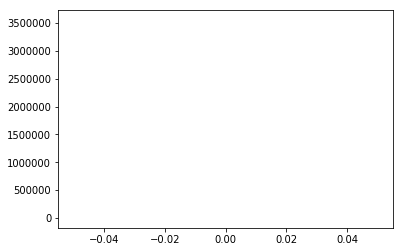

In [27]:
for i, v in o.iterrows():
    if v[2] == "train":
        color = "b"
    else:
        color = "r"
    
    plt.plot(v[1], c=color)

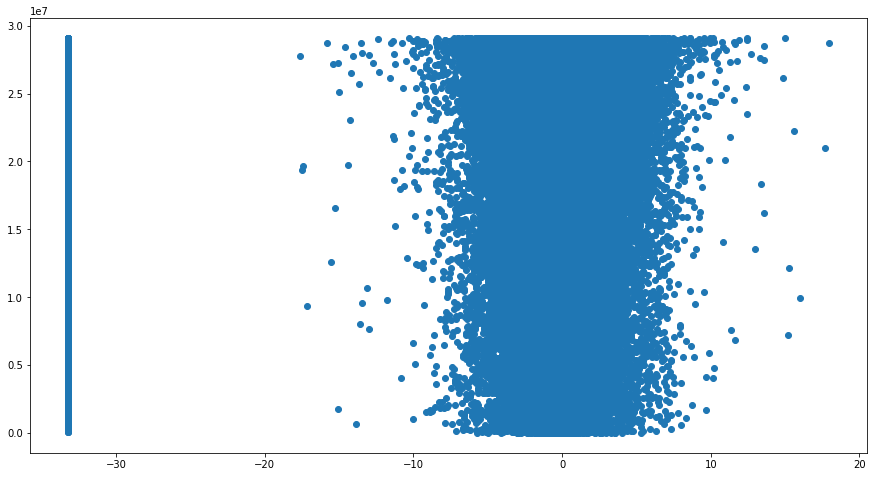

In [10]:
a = pd.merge(h_trs[["card_id"]].reset_index(), df_train[["card_id", "target"]], on="card_id", how="inner")
a.columns = ["index_", "card_id", "target"]
b = a.groupby("card_id")["index_", "target"].min().reset_index()
c = b.sort_values(by="card_id")

plt.figure(figsize=(15,8))
plt.scatter(c.target, c.index_)

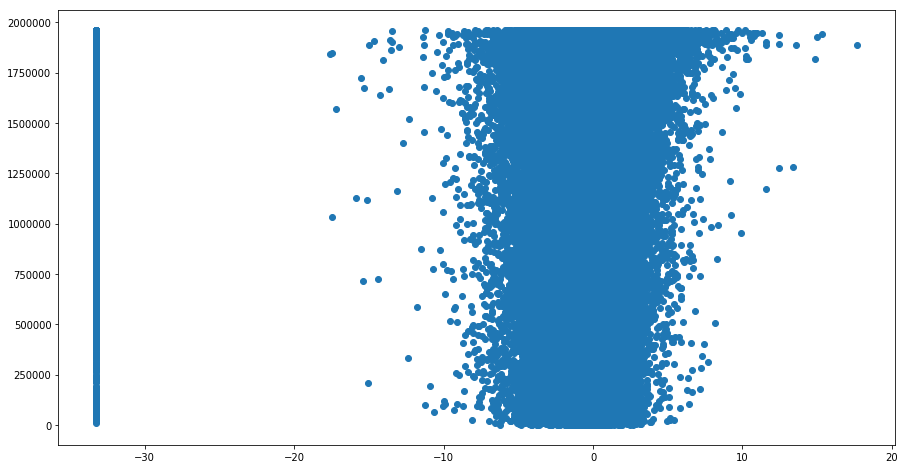

In [18]:
a = pd.merge(n_trs[["card_id"]].reset_index(), df_train[["card_id", "target"]], on="card_id", how="inner")
a.columns = ["index_", "card_id", "target"]
b = a.groupby("card_id")["index_", "target"].min().reset_index()
c = b.sort_values(by="card_id")

plt.figure(figsize=(15,8))
plt.scatter(c.target, c.index_)

In [11]:
import numpy as np

In [13]:
h.head()

,index,card_id
0,0,C_ID_4e6213e9bc
1,1,C_ID_4e6213e9bc
2,2,C_ID_4e6213e9bc
3,3,C_ID_4e6213e9bc
4,4,C_ID_4e6213e9bc


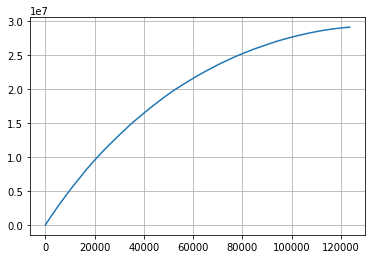

In [19]:
h = pd.merge(h_trs[["card_id"]].reset_index(), df_test[["card_id"]], on="card_id", how="inner")
h.columns = ["index_", "card_id"]
g = h.groupby("card_id")["index_"].min().reset_index()

plt.plot(sorted(g.index_.tolist()))
plt.grid()

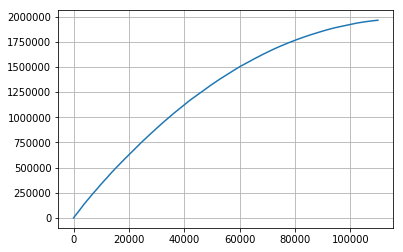

In [20]:
h = pd.merge(n_trs[["card_id"]].reset_index(), df_test[["card_id"]], on="card_id", how="inner")
h.columns = ["index_", "card_id"]
g = h.groupby("card_id")["index_"].min().reset_index()

plt.plot(sorted(g.index_.tolist()))
plt.grid()

In [93]:
g.sort_values(by="index_")

,card_id,index_
31618,C_ID_415bb3a509,0
37946,C_ID_4e6213e9bc,0
121198,C_ID_fb0875cd28,40
99554,C_ID_cde58e2519,124
101213,C_ID_d15cd87e37,152
33624,C_ID_458deb9a23,185
122349,C_ID_fd55871fd8,186
92051,C_ID_be71a60d23,191
71583,C_ID_93e49567ad,217
78844,C_ID_a32abb665a,218


In [29]:
sub1 = pd.read_csv("./output/submission_model20181228.csv")

In [30]:
sub2 = pd.read_csv("./output/submission_model20190106.csv")

In [31]:
sub3 = sub1.target.values*0.8 + sub2.target.values*0.2

In [32]:
submission = pd.DataFrame({"card_id":sub1.card_id, "target":sub3})

In [33]:
submission.to_csv("./output/submission_model20190108.csv", index=False)